In [1]:
__author__ = "Chuhang Liu"

import numpy as np
import matplotlib.pyplot as plt
import os
import tifffile as tiff
import imageio
import scipy.signal
import scipy
from matplotlib import figure
import h5py
import hdf5plugin
import cv2
from tqdm import tqdm
import cmasher as cmr

In [4]:
# Define source dict
dirstr = 'E:\\2100f_data_Dectris\\YIG_250822_insitu\\videos\\V1\\'

In [5]:
name1 = 'V1'
filename = dirstr + name1 +'_master.h5'
with h5py.File(filename, 'r') as f:
    print(list(f.keys()))
    #f.visit(print)
    file_list = list(f['entry/data'].keys())

['entry']


0.4330331 1.3431107 1.0001004


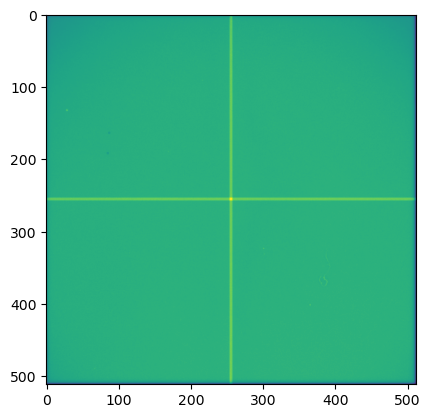

In [6]:
flatfield = tiff.imread('C:\\Users\\cliu2\\Github\\H5_conversion\\Mean_300_FFMean_1e6.tif')
plt.imshow(flatfield,cmap='viridis')
print(np.min(flatfield),np.max(flatfield),np.mean(flatfield))

In [8]:
for file in tqdm(file_list[::1]):
    with h5py.File(filename, 'r') as f:
        #print(f.keys())
        # Load data
        dataset = f['entry/data/' + file]
        # Read the dataset into a NumPy array
        data = np.array(dataset)
        # For images with dead pixels
        #data[data == 4294967295] = 0
        data = data[0].reshape(512, 512)
        # fix the crosshair mark
        data = data*flatfield
        data = data.astype(np.float32)
        # detect dead pixels position
        '''
        for i in range(512):
            for j in range(512):
                
                if data[i, j] == 0:
                    print(i, j)
                    data[i, j] = (data[i-1, j] + data[i+1, j] + data[i, j-1] + data[i, j+1])/4

        '''
        # fix dead pixels
        data[164, 87] = (data[163, 87] + data[165, 87] + data[164, 86] + data[164, 88])/4
        data[192,85] = (data[191, 85] + data[193, 85] + data[192, 84] + data[192, 86])/4
        # max_threshold = 0.6 * max_val
        # min_threshold = 0.2 * max_val
        max_val = np.max(data)
        #print("max_val: ", max_val)
        min_val = np.min(data) 
        #print("min_val: ", min_val)
        # for image
        data2 = data.copy()
        max_threshold = np.percentile(data2, 99)
        # for diffraction
        #max_threshold = np.percentile(data, 99.9)
        #print(max_threshold)
        data2[data2 > max_threshold] = max_threshold
        min_threshold = np.percentile(data2, 1)
        #print(min_threshold)
        data2[data2 < min_threshold] = min_threshold

        # generate tiffs
        name = file
        # for diffraction
        #Cmap = plt.cm.turbo
        # for image
        Cmap = plt.cm.gray
        dest_dir = dirstr + name1 + "im" + '\\'
        try:
            plt.imsave(dest_dir + name1 +'_' + file + '.tif', data2, format='tiff', cmap=Cmap)
            tiff.imwrite(dest_dir + name1 +'_' + file + '.tiff', data)
            np.save(dest_dir + name1 +'_' + file + '.npy', data)
        except:
            os.makedirs(dest_dir, exist_ok=True)
            plt.imsave(dest_dir + name1 + '_' + file + '.tif', data2, format='tiff', cmap=Cmap)
            tiff.imwrite(dest_dir + name1 +'_' + file + '.tiff', data)
            np.save(dest_dir + name1 +'_' + file + '.npy', data)

100%|██████████| 400/400 [00:14<00:00, 27.88it/s]
